# Microprossor Weekly Forecasts and Orders Data Analysis

Source: Matthew P. Manary, Sean P. Willems (2021) Data Set: 187 Weeks of Customer Forecasts and Orders for Microprocessors from Intel Corporation. Manufacturing & Service Operations Management 0(0).https://doi.org/10.1287/msom.2020.0933

<HR/>

## <font color='red'/>Student Name:</font>

#### *Yash Malhan*

<hr/>


## <font color='blue'>Context</font>

<HR/>

We will work with a dataset that contains weekly data for Intel microprocessors for 187 consecutive weeks. The dataset comprises of forecast and customer order numbers for 86 Stock Keeping Units (SKUs) that represent five product generations. The demand is grouped by SKU and Distribution Centers (DCs) and a total of 5 DCs are present in the data. In addition to forecasts and orders, the dataset provides the Average Selling Price (ASP) category. I have modified the data from its orginal form to allow us to practice our data cleaning skills.

**This dataset can be used to examine demand distributions, forecast accuracy, differences in product generations and pricing.**

<BR/>
<BR/>
<HR/>


### Start by reading the data into a data frame and examining it. The data is in the file "Microprocessor_Forecasts_Orders.csv" located in the scratch folder. 

In [27]:
# read the data into a data frame called data and implement other meaningful steps.
import pandas as pd
import matplotlib.pyplot as plt

intel_data = pd.read_csv('../scratch/Microprocessor_Forecasts_Orders.csv', na_values = "*")
intel_data.head()
#SKU A - 2
#A is product name and 2 is the generation

,Distribution Center,SKU,ASP Group,Week,Forecasted Demand,Customer Orders
0,ALPHA,SKU-A-2,1,1,8949,11146
1,ALPHA,SKU-B-2,1,1,11146,3503
2,ALPHA,SKU-C-1,3,1,1274,5892
3,ALPHA,SKU-C-2,4,1,20717,3185
4,ALPHA,SKU-F-1,6,1,24522,6529


In [28]:
intel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26114 entries, 0 to 26113
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Distribution Center  26114 non-null  object
 1   SKU                  26114 non-null  object
 2   ASP Group            26114 non-null  int64 
 3   Week                 26114 non-null  int64 
 4   Forecasted Demand    26114 non-null  int64 
 5   Customer Orders      26114 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


<BR/>
<BR/>
<HR/>

### Compile the descriptive statistics.

In [29]:
intel_data.describe()

,ASP Group,Week,Forecasted Demand,Customer Orders
count,26114.000000,26114.000000,2.611400e+04,26114.000000
mean,10.658229,98.097381,3.902315e+04,12324.722180
std,5.240162,50.980936,8.262289e+04,21509.126255
min,1.000000,1.000000,0.000000e+00,16.000000
25%,7.000000,57.000000,1.592000e+03,1035.000000
50%,12.000000,98.000000,9.076000e+03,4299.000000
75%,14.000000,139.750000,3.564900e+04,14013.000000
max,22.000000,187.000000,1.150510e+06,381369.000000


<BR/>
<BR/>
<HR/>

### Confirm that there are as many weeks, SKUs and DCs as stated in the context. List the unique SKU and DC values.

In [30]:
# We will work with a dataset that contains weekly data for Intel microprocessors for 187 consecutive weeks. 
#The dataset comprises of forecast and customer order numbers for 86 Stock Keeping Units (SKUs) that represent five product generations.
#The demand is grouped by SKU and Distribution Centers (DCs) and a total of 5 DCs are present in the data. In addition to forecasts and orders,
#the dataset provides the Average Selling Price (ASP) category. I have modified the data from its orginal form to allow us to practice our data cleaning skills.
print(intel_data['Week'].nunique())
print(intel_data['SKU'].nunique())
print(intel_data['Distribution Center'].nunique())

print(intel_data['SKU'].unique())
intel_data['Distribution Center'].unique()

187
86
5
['SKU-A-2' 'SKU-B-2' 'SKU-C-1' 'SKU-C-2' 'SKU-F-1' 'SKU-F-2' 'SKU-H-2'
 'SKU-I-2' 'SKU-J-2' 'SKU-K-2' 'SKU-L-1' 'SKU-L-2' 'SKU-M-2' 'SKU-O-1'
 'SKU-O-2' 'SKU-Q-2' 'SKU-S-2' 'SKU-B-1' 'SKU-E-2' 'SKU-G-2' 'SKU-H-1'
 'SKU-K-1' 'SKU-N-2' 'SKU-Q-1' 'SKU-M-1' 'SKU-Q-3' 'SKU-C-3' 'SKU-F-3'
 'SKU-H-3' 'SKU-K-3' 'SKU-O-3' 'SKU-B-3' 'SKU-G-3' 'SKU-L-3' 'SKU-N-3'
 'SKU-A-3' 'SKU-E-3' 'SKU-I-3' 'SKU-S-3' 'SKU-U-3' 'SKU-T-3' 'SKU-J-3'
 'SKU-B-4' 'SKU-O-4' 'SKU-Q-4' 'SKU-U-4' 'SKU-W-4' 'SKU-C-4' 'SKU-K-4'
 'SKU-L-4' 'SKU-A-4' 'SKU-T-4' 'SKU-D-4' 'SKU-F-4' 'SKU-G-4' 'SKU-H-4'
 'SKU-V-4' 'SKU-I-4' 'SKU-N-4' 'SKU-R-4' 'SKU-S-4' 'SKU-J-4' 'SKU-E-4'
 'SKU-P-4' 'SKU-A-5' 'SKU-D-5' 'SKU-K-5' 'SKU-C-5' 'SKU-B-5' 'SKU-R-5'
 'SKU-T-5' 'SKU-U-5' 'SKU-V-5' 'SKU-Y-5' 'SKU-X-5' 'SKU-L-5' 'SKU-Q-5'
 'SKU-S-5' 'SKU-W-5' 'SKU-J-5' 'SKU-E-5' 'SKU-F-5' 'SKU-H-5' 'SKU-N-5'
 'SKU-I-5' 'SKU-G-5']


array(['ALPHA', 'BETA', 'GAMMA', 'DELTA', 'EPSILON'], dtype=object)

<BR/>
<BR/>
<HR/>

### What is the highest number of generations of any SKU?

In [31]:
#split the SKU column by '-'
new_data =intel_data['SKU'].str.split('-', expand = True)


new_data['Product'] = new_data[1]
new_data['Generation'] = new_data[2].astype(int)
print(new_data.head())
new_data['Generation'].max()


intel_data['Product'] = new_data['Product']
intel_data['Generation'] = new_data['Generation']
new_data.drop([1,2], axis = 1)

     0  1  2 Product  Generation
0  SKU  A  2       A           2
1  SKU  B  2       B           2
2  SKU  C  1       C           1
3  SKU  C  2       C           2
4  SKU  F  1       F           1


,0,Product,Generation
0,SKU,A,2
1,SKU,B,2
2,SKU,C,1
3,SKU,C,2
4,SKU,F,1
...,...,...,...
26109,SKU,V,4
26110,SKU,V,5
26111,SKU,W,4
26112,SKU,W,5


<BR/>
<BR/>
<HR/>

### Create a visualization that allows the reader to see how many products (SKUs) are at different stages of maturity. What do you conclude from this analysis?

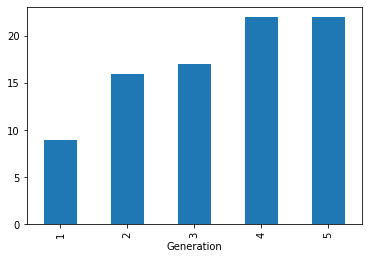

In [32]:
#rename column 
new_data.rename(columns = {0 : 'SKU'})

new_data.groupby('Generation')['Product'].nunique().plot(kind = 'bar');

In [33]:
gendata = new_data.groupby('Product')['Generation'].max()

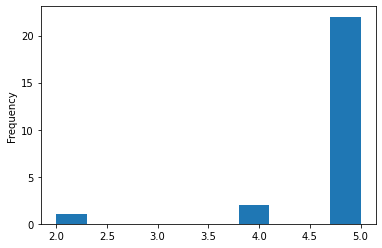

In [34]:
gendata.plot(kind = 'hist');

<BR/>
<BR/>
<HR/>

### Analyze the distribution of weekly demand to identify patterns and also analyze the distribution of overall demand and demand across the five DCs and note your observations.

In [35]:
intel_data['Customer Orders'].describe()

count     26114.000000
mean      12324.722180
std       21509.126255
min          16.000000
25%        1035.000000
50%        4299.000000
75%       14013.000000
max      381369.000000
Name: Customer Orders, dtype: float64

,Distribution Center,SKU,ASP Group,Week,Forecasted Demand,Customer Orders,Product,Generation
0,ALPHA,SKU-A-2,1,1,8949,11146,A,2
1,ALPHA,SKU-B-2,1,1,11146,3503,B,2
2,ALPHA,SKU-C-1,3,1,1274,5892,C,1
3,ALPHA,SKU-C-2,4,1,20717,3185,C,2
4,ALPHA,SKU-F-1,6,1,24522,6529,F,1


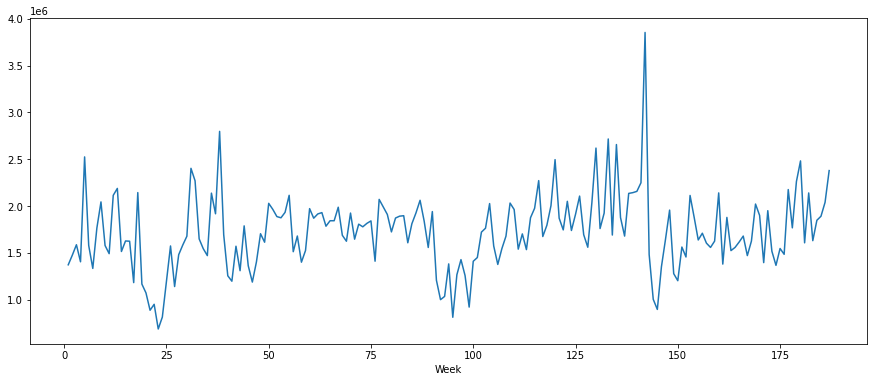

In [36]:

#intel_data.plot(kind='line', x= 'Week', y = 'Customer Orders');


grp_data = intel_data.groupby('Week')['Customer Orders'].sum()
grp_data.plot(kind = 'line', figsize =(15,6));

#print(grp_data.reset_index())
intel_data.head()

In [37]:
import numpy as np
#conditions to columns values

conditions = [ (intel_data['Week'] >= 1) & (intel_data['Week'] <= 52),
             (intel_data['Week'] >= 53) & (intel_data['Week'] <= 104),
             (intel_data['Week'] >= 105) & (intel_data['Week'] <=156),
             (intel_data['Week'] >= 157 & (intel_data['Week'] <= 188))
   ]

choices = [1,2,3,4]


intel_data['Year'] = np.select(conditions,choices,0)

intel_data.head()
intel_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26114 entries, 0 to 26113
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Distribution Center  26114 non-null  object
 1   SKU                  26114 non-null  object
 2   ASP Group            26114 non-null  int64 
 3   Week                 26114 non-null  int64 
 4   Forecasted Demand    26114 non-null  int64 
 5   Customer Orders      26114 non-null  int64 
 6   Product              26114 non-null  object
 7   Generation           26114 non-null  int64 
 8   Year                 26114 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.8+ MB


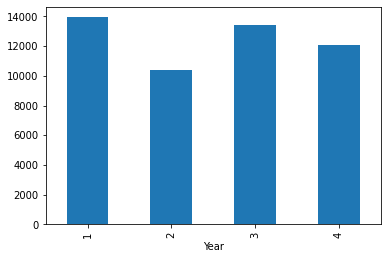

In [38]:
intel_data.groupby('Year')['Customer Orders'].mean().plot(kind = 'bar');

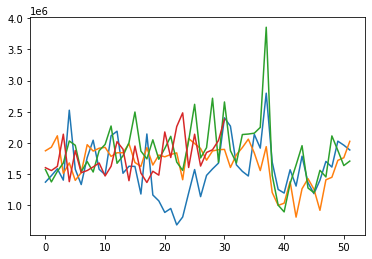

In [47]:
intel_data[intel_data['Year'] == 1].groupby('Week')['Customer Orders'].sum().reset_index()['Customer Orders'].plot(kind = 'line');
intel_data[intel_data['Year'] == 2].groupby('Week')['Customer Orders'].sum().reset_index()['Customer Orders'].plot(kind = 'line');
intel_data[intel_data['Year'] == 3].groupby('Week')['Customer Orders'].sum().reset_index()['Customer Orders'].plot(kind = 'line');
intel_data[intel_data['Year'] == 4].groupby('Week')['Customer Orders'].sum().reset_index()['Customer Orders'].plot(kind = 'line');

In [40]:
hmData = intel_data.pivot_table(index = 'Product', columns = 'Distribution Center', values = 'Customer Orders', aggfunc = np.sum)
hmData

Distribution Center,ALPHA,BETA,DELTA,EPSILON,GAMMA
Product,,,,,
A,1918943.0,80393.0,2162353.0,2575635.0,5701156.0
B,4348567.0,96002.0,5023256.0,8201910.0,6561318.0
C,7745384.0,204435.0,14085345.0,20082163.0,11142476.0
D,78815.0,35504.0,778839.0,1586308.0,709076.0
E,80079.0,164472.0,1054449.0,2166229.0,1003678.0
F,4136773.0,138521.0,7538254.0,14652226.0,7441942.0
G,232463.0,63354.0,1014204.0,1754766.0,672149.0
H,2590273.0,63831.0,5738057.0,11706677.0,4089808.0
I,500304.0,125295.0,1490733.0,3522453.0,1016548.0


<AxesSubplot:xlabel='Distribution Center', ylabel='Product'>

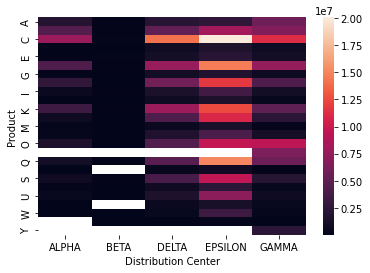

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(hmData)

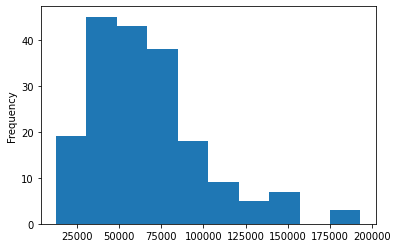

In [42]:
intel_data[intel_data['Product'] == 'A'].groupby('Week')['Customer Orders'].sum().plot(kind = 'hist');

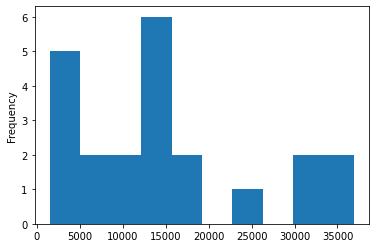

In [43]:
intel_data[intel_data['Product'] == 'X'].groupby('Week')['Customer Orders'].sum().plot(kind = 'hist');

<AxesSubplot:xlabel='Distribution Center', ylabel='Customer Orders'>

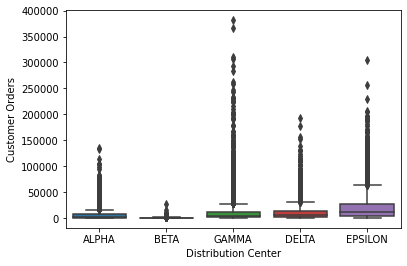

In [44]:
sns.boxplot(data = intel_data, y='Customer Orders',x = 'Distribution Center')

<BR/>
<BR/>
<HR/>